now we will train the polynomial regression model

In [288]:
#importing all libraries:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,SGDRegressor
from sklearn.preprocessing import PolynomialFeatures,StandardScaler
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline

In [289]:
x=6*np.random.rand(200,1)-3
y=0.8*x**2+0.9*x+2+np.random.rand(200,1)
# y=0.8x^2+0.9x+2

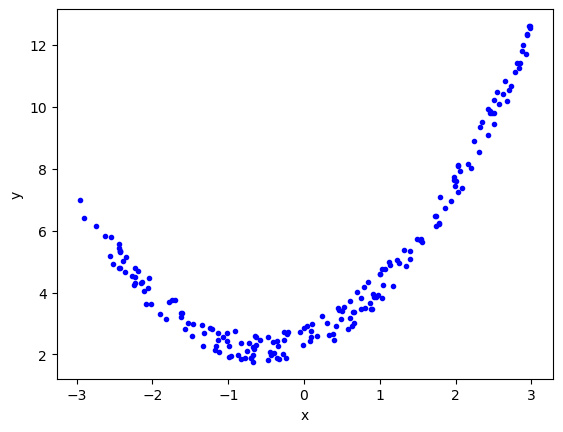

In [290]:
#displaying data
plt.plot(x,y,'b .')
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [291]:
#splitting data into train  & test set
xTrain,xTest,yTrain,yTest=train_test_split(x,y,test_size=0.2,random_state=2)

In [292]:
#applying simple linear regression
lr = LinearRegression()
lr.fit(xTrain,yTrain)
yPred = lr.predict(xTest)
yPred

array([[7.94838812],
       [2.35496568],
       [3.45723572],
       [5.41715712],
       [6.46245763],
       [4.21635031],
       [6.7490399 ],
       [5.89623979],
       [3.92983629],
       [8.1065664 ],
       [3.78706075],
       [3.20186381],
       [7.53704036],
       [5.47741919],
       [4.33115303],
       [2.18681083],
       [3.41132302],
       [3.23253082],
       [8.11504645],
       [5.8347846 ],
       [3.83399338],
       [2.29985837],
       [7.02844401],
       [2.8924599 ],
       [4.76699726],
       [5.64211453],
       [3.31246242],
       [8.08858298],
       [7.35005389],
       [1.95041445],
       [4.40920399],
       [5.72425958],
       [1.60583338],
       [7.61823495],
       [5.09628548],
       [4.8452396 ],
       [1.36442428],
       [5.52355392],
       [4.00225451],
       [7.39533607]])

In [293]:
r2_score(yTest,yPred)

0.4556671732494866

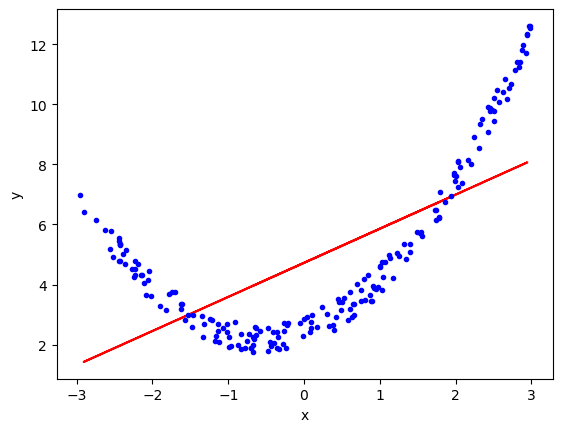

In [294]:
plt.plot(xTrain,lr.predict(xTrain),'r')
plt.plot(x,y,'b.')
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [295]:
#applying polynomial lr
poly = PolynomialFeatures(degree=2)
xTrainTrans = poly.fit_transform(xTrain)
xTestTrans = poly.fit_transform(xTest)
print(xTrain[0])
print(xTrainTrans[0])

[-0.67329279]
[ 1.         -0.67329279  0.45332319]


In [296]:
#including bias
lr=LinearRegression()
lr.fit(xTrainTrans,yTrain)
yPred = lr.predict(xTestTrans)
yPred

array([[11.56973546],
       [ 4.14250304],
       [ 2.50212407],
       [ 3.34854913],
       [ 5.76966917],
       [ 2.2584022 ],
       [ 6.67277868],
       [ 4.28810997],
       [ 2.26548816],
       [12.3502201 ],
       [ 2.30745045],
       [ 2.74655637],
       [ 9.68695338],
       [ 3.45090776],
       [ 2.28445108],
       [ 4.52669682],
       [ 2.54004004],
       [ 2.71288228],
       [12.39294858],
       [ 4.15149345],
       [ 2.29083634],
       [ 4.26450394],
       [ 7.65242353],
       [ 3.15227361],
       [ 2.53382668],
       [ 3.75388307],
       [ 2.63065594],
       [12.25990536],
       [ 8.9012476 ],
       [ 5.12677075],
       [ 2.31159907],
       [ 3.91771187],
       [ 6.12698832],
       [10.04178133],
       [ 2.8802111 ],
       [ 2.6038151 ],
       [ 6.91642806],
       [ 3.53234807],
       [ 2.25397557],
       [ 9.0874972 ]])

In [297]:
print(r2_score(yTest,yPred))
print(lr.coef_)
print(lr.intercept_)


0.9912166100382465
[[0.         0.89948422 0.80710453]]
[2.49944266]


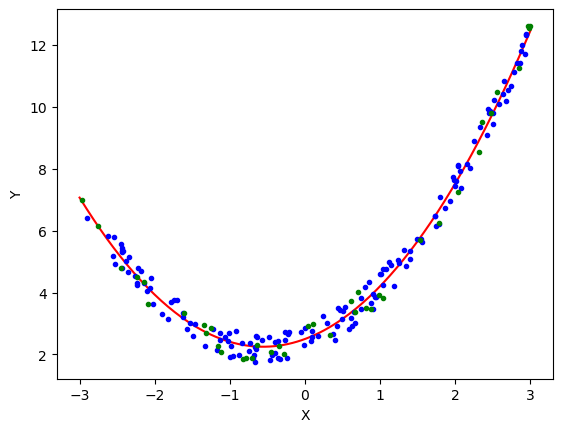

In [298]:
xNew=np.linspace(-3, 3, 200).reshape(200, 1)
xNewPoly = poly.transform(xNew)
yNew = lr.predict(xNewPoly)
plt.plot(xNew,yNew,'r-',label="Prediction")
plt.plot(xTrain,yTrain,'b.',label="Training points")
plt.plot(xTest,yTest,'g.',label="Test points")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [299]:
def polynomialRegression(degree):
    xNew=np.linspace(-3,3,100).reshape(100,1)
    xNewPoly=poly.transform(xNew)
    polyBigFeatures = PolynomialFeatures(degree=degree,include_bias=False)
    stdScaler = StandardScaler()
    linReg = LinearRegression()
    polynomialRegression = Pipeline([('Poly_features',polyBigFeatures),("std_scaler",stdScaler),("linReg",linReg),])
    polynomialRegression.fit(x,y)
    yNewBig = polynomialRegression.predict(xNew)
    plt.plot(xNew,yNewBig,'r',label="Degree "+str(degree))
    plt.plot(xTrain,yTrain,'b.')
    plt.plot(xTest,yTest,'g.')
    plt.legend(loc="upper left")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.axis([-3,3,0,10])
    plt.show()

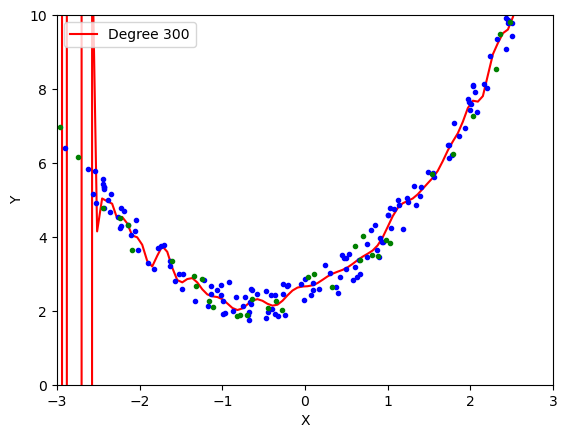

In [300]:
polynomialRegression(300)

In [301]:
poly.powers_

array([[0],
       [1],
       [2]])

In [302]:
#3D polynomial regression
x = 7 * np.random.rand(100, 1) - 2.8
y = 7 * np.random.rand(100, 1) - 2.8

z = x**2 + y**2 + 0.2*x + 0.2*y + 0.1*x*y +2 + np.random.randn(100, 1)
# z = x^2 + y^2 + 0.2x + 0.2y + 0.1xy + 2

In [303]:
import plotly.express as px
df = px.data.iris()
fig = px.scatter_3d(df,x=x.ravel(),y=y.ravel(),z=z.ravel())
fig.show()

In [304]:
lr=LinearRegression()
lr.fit(np.array([x,y]).reshape(100,2),z)
xInput = np.linspace(x.min(),x.max(),10)
yInput=np.linspace(y.min(),y.max(),10)
xGrid,yGrid=np.meshgrid(xInput,yInput)
final = np.vstack((xGrid.ravel().reshape(1,100),yGrid.ravel().reshape(1,100))).T
zFinal=lr.predict(final).reshape(10,10)

In [305]:
import plotly.graph_objects as go
fig =px.scatter_3d(df,x=x.ravel(),y=y.ravel(),z=z.ravel())
fig.add_trace(go.Surface(x=xInput,y=yInput,z=zFinal))
fig.show()

In [306]:
xMulti=np.array([x,y]).reshape(100,2)
xMulti.shape

(100, 2)

In [307]:
poly = PolynomialFeatures(degree=30)
xMultiTrans = poly.fit_transform(xMulti)

In [308]:
# print("Input",poly.n_input_features_)
print("Ouput",poly.n_output_features_)
print("Powers\n",poly.powers_)
xMultiTrans.shape

Ouput 496
Powers
 [[ 0  0]
 [ 1  0]
 [ 0  1]
 [ 2  0]
 [ 1  1]
 [ 0  2]
 [ 3  0]
 [ 2  1]
 [ 1  2]
 [ 0  3]
 [ 4  0]
 [ 3  1]
 [ 2  2]
 [ 1  3]
 [ 0  4]
 [ 5  0]
 [ 4  1]
 [ 3  2]
 [ 2  3]
 [ 1  4]
 [ 0  5]
 [ 6  0]
 [ 5  1]
 [ 4  2]
 [ 3  3]
 [ 2  4]
 [ 1  5]
 [ 0  6]
 [ 7  0]
 [ 6  1]
 [ 5  2]
 [ 4  3]
 [ 3  4]
 [ 2  5]
 [ 1  6]
 [ 0  7]
 [ 8  0]
 [ 7  1]
 [ 6  2]
 [ 5  3]
 [ 4  4]
 [ 3  5]
 [ 2  6]
 [ 1  7]
 [ 0  8]
 [ 9  0]
 [ 8  1]
 [ 7  2]
 [ 6  3]
 [ 5  4]
 [ 4  5]
 [ 3  6]
 [ 2  7]
 [ 1  8]
 [ 0  9]
 [10  0]
 [ 9  1]
 [ 8  2]
 [ 7  3]
 [ 6  4]
 [ 5  5]
 [ 4  6]
 [ 3  7]
 [ 2  8]
 [ 1  9]
 [ 0 10]
 [11  0]
 [10  1]
 [ 9  2]
 [ 8  3]
 [ 7  4]
 [ 6  5]
 [ 5  6]
 [ 4  7]
 [ 3  8]
 [ 2  9]
 [ 1 10]
 [ 0 11]
 [12  0]
 [11  1]
 [10  2]
 [ 9  3]
 [ 8  4]
 [ 7  5]
 [ 6  6]
 [ 5  7]
 [ 4  8]
 [ 3  9]
 [ 2 10]
 [ 1 11]
 [ 0 12]
 [13  0]
 [12  1]
 [11  2]
 [10  3]
 [ 9  4]
 [ 8  5]
 [ 7  6]
 [ 6  7]
 [ 5  8]
 [ 4  9]
 [ 3 10]
 [ 2 11]
 [ 1 12]
 [ 0 13]
 [14  0]
 [13  1]
 [12  2]
 [11  3]
 

(100, 496)

In [309]:
lr=LinearRegression()
lr.fit(xMultiTrans,z)
xTestMulti = poly.transform(final)
zFinal= lr.predict(xMultiTrans).reshape(10,10)

In [310]:
# fig=px.scatter_3d(x=x.ravel(),y=y.ravel(),z=z.ravel())
# # fig.add_trace(go.surface(x=xInput,y=yInput,z=zFinal))
# fig.add_surface(x=xInput, y=yInput, z=zFinal)
# fig.update_layout(scene = dict(zaxis = dict(range=[0,3,5])))
# fig.show()

fig = px.scatter_3d(x=x.ravel(), y=y.ravel(), z=z.ravel())

fig.add_trace(go.Surface(x = xInput, y = yInput, z =zFinal))

fig.update_layout(scene = dict(zaxis = dict(range=[0,35])))

fig.show()
